# 타이타닉 데이터세트 로딩하기


In [ ]:
import pandas as pd
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Histogram
연속값에 대한 구간별 도수 분포를 시각화


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

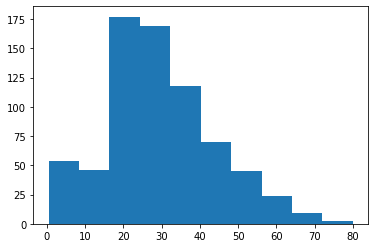

In [ ]:
### matplotlib histogram
import matplotlib.pyplot as plt
plt.hist(titanic_df['Age'])
#plt.show()


<AxesSubplot:>

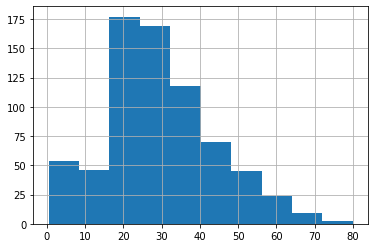

In [ ]:
# Pandas 에서 hist 함수를 바로 호출할 수 있음.
titanic_df['Age'].hist()

## seaborn histogram
seaborn의 예전 histogram은 distplot함수지만 deprecate됨.
seaborn의 histogram은 histplot과 displot이 대표적이며 histplot은 axes레벨, displot은 figure레벨임

C:\Users\82105\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

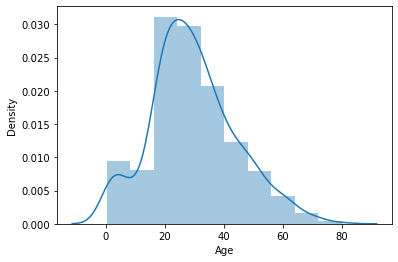

In [ ]:
import seaborn as sns
#import warnings
#warnings.filterwarnings('ignore')
sns.distplot(titanic_df['Age'], bins=10)
#sns.distplot(titanic_df['Age'], bins=10, kde =False)

<AxesSubplot:xlabel='Age', ylabel='Count'>

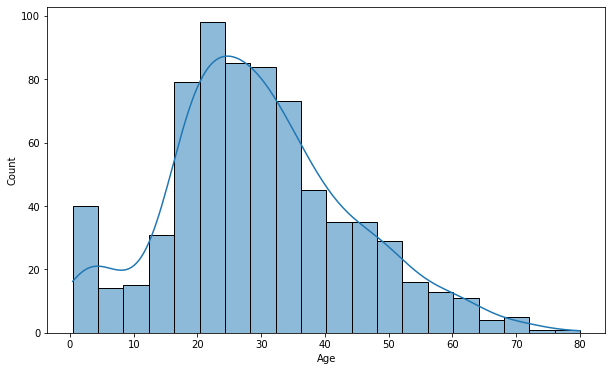

In [ ]:
### seaborn histogram
import seaborn as sns
# seaborn에서도 figure로 canvas의 사이즈를 조정
plt.figure(figsize=(10, 6))
# Pandas DataFrame의 컬럼명을 자동으로 인식해서 xlabel값을 할당. ylabel 값은 histogram일때 Count 할당.
sns.histplot(titanic_df['Age'], kde=True)
#plt.show()


<AxesSubplot:xlabel='Age', ylabel='Count'>

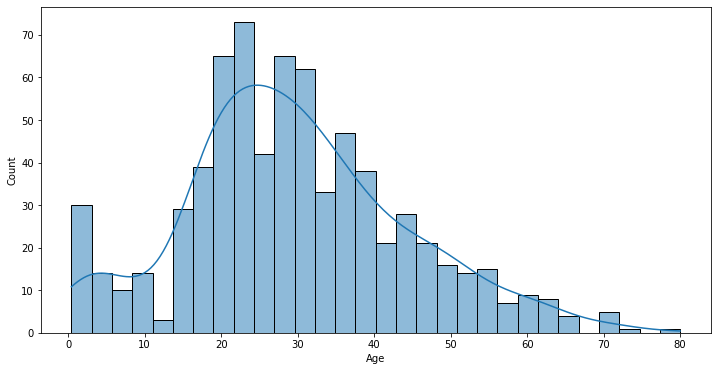

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', data=titanic_df, kde=True, bins=30)


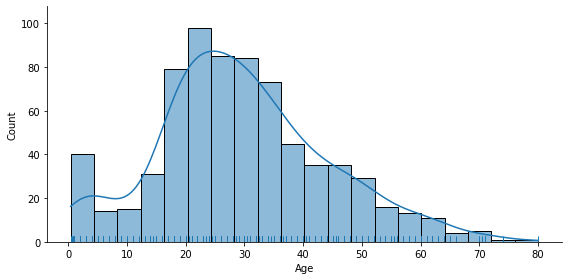

In [ ]:
import seaborn as sns
# seaborn의 figure레벨 그래프는 plt.figure로 figure 크기를 조절할 수 없습니다.
#plt.figure(figsize=(4, 4))
# Pandas DataFrame의 컬럼명을 자동으로 인식해서 xlabel값을 할당. ylabel 값은 histogram일때 Count 할당.
sns.displot(titanic_df['Age'], kde=True, rug=True, height=4, aspect=2)
#plt.show()

C:\Users\82105\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\82105\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

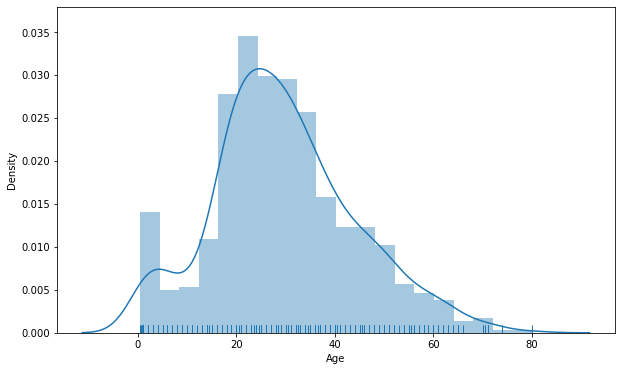

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(titanic_df['Age'], kde=True, rug=True)


### seaborn의 countplot은 카테고리 값에 대한 건수를 표현. x축이 카테고리값, y축이 해당 카테고리
값에 대한 건수

<AxesSubplot:xlabel='Pclass', ylabel='count'>

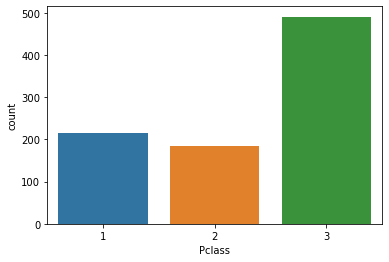

In [ ]:
sns.countplot(x='Pclass', data=titanic_df)


## barplot
seaborn의 barplot은 x축은 이산값(주로 category값), y축은 연속값(y값의 평균/총합)을 표현

In [ ]:
titanic_df.head(5)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

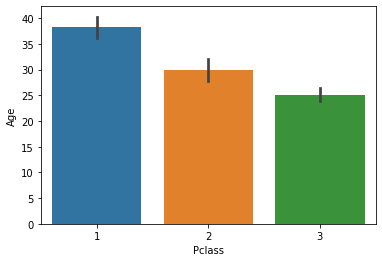

In [ ]:
#plt.figure(figsize=(10, 6))
# 자동으로 xlabel, ylabel을 x입력값, y입력값으로 설정.
sns.barplot(x='Pclass', y='Age', data=titanic_df)


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

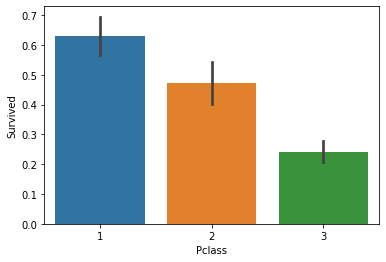

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Sex'>

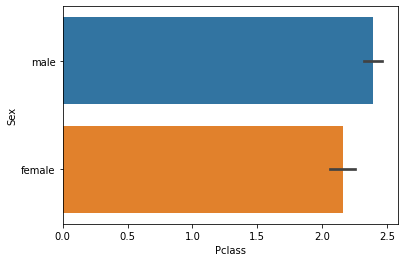

In [ ]:
### 수직 barplot에 y축을 문자값으로 설정하면 자동으로 수평 barplot으로 변환
sns.barplot(x='Pclass', y='Sex', data=titanic_df)


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

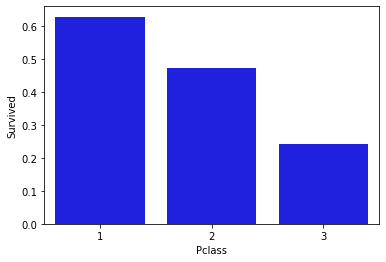

In [ ]:
# confidence interval을 없애고, color를 통일.
sns.barplot(x='Pclass', y='Survived', data=titanic_df, ci=None, color='blue')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

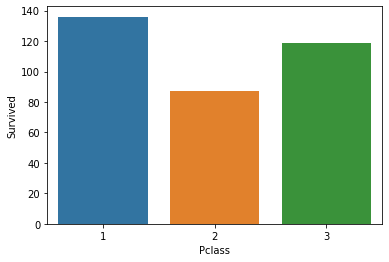

In [ ]:
# 평균이 아니라 총합으로 표현. estimator=sum
sns.barplot(x='Pclass', y='Survived', data=titanic_df, ci=None, estimator=sum)


## bar plot에서 hue를 이용하여 X값을 특정 컬럼별로 세분화하여 시각화

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

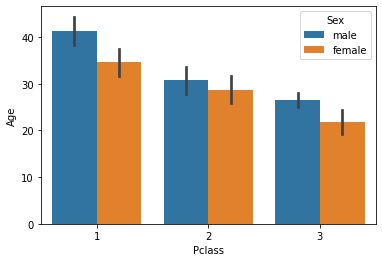

In [ ]:
# 아래는 Pclass가 X축값이며 hue파라미터로 Sex를 설정하여 개별 Pclass 값 별로 Sex에 따른 Age 평균 값을 구함.
sns.barplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)


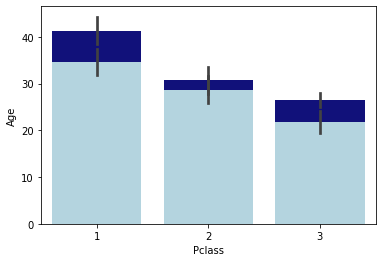

In [ ]:
# 아래는 stacked bar를 흉내 냈으나 stacked bar라고 할 수 없음.
bar1 = sns.barplot(x="Pclass", y="Age", data=titanic_df[titanic_df['Sex']=='male'], color='darkblue')
bar2 = sns.barplot(x="Pclass", y="Age", data=titanic_df[titanic_df['Sex']=='female'], color='lightblue')


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

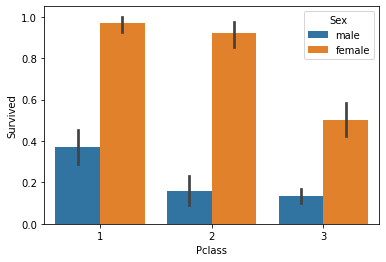

In [ ]:
# Pclass가 X축값이며 Survived가 Y축값. hue파라미터로 Sex를 설정하여 개별 Pclass 값 별로 Sex에 따른 Survived 평균 값을 구함.
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)


In [ ]:
# 나이에 따라 세분화된 분류를 수행하는 함수 생성.
def get_category(age):
    cat = ''
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    return cat
# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정.
# get_category(X)는 입력값으로 ‘Age’ 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

In [ ]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Elderly
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Young Adult


<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

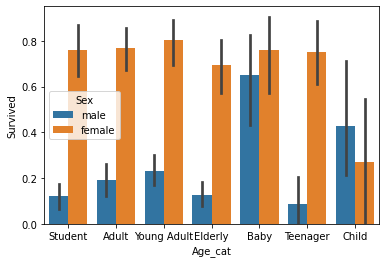

In [ ]:
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df)


<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

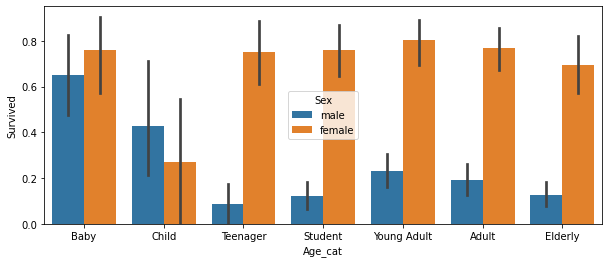

In [ ]:
plt.figure(figsize=(10, 4))
order_columns = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=order_columns)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

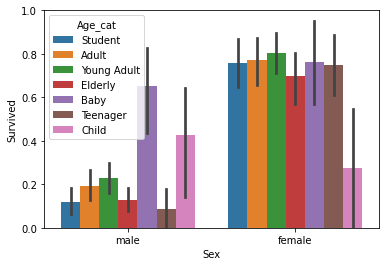

In [ ]:
sns.barplot(x='Sex', y='Survived', hue='Age_cat', data=titanic_df)

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

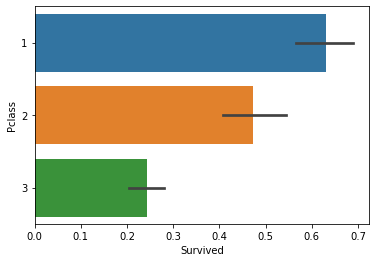

In [ ]:
# orient를 h를 하면 수평 바 플롯을 그림. 단 이번엔 y축값이 이산형 값
sns.barplot(x='Survived', y='Pclass', data=titanic_df, orient='h')

In [ ]:
violin plot
단일 컬럼에 대해서는 히스토그램과 유사하게 연속값의 분포도를 시각화. 또한 중심에는 4분위를 알수있음.
보통은 X축에 설정한 컬럼의 개별 이산값 별로 Y축 컬럼값의 분포도를 시각화하는 용도로 많이 사용


<AxesSubplot:ylabel='Age'>

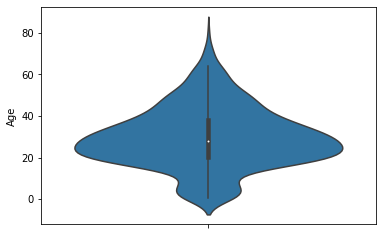

In [ ]:
# Age 컬럼에 대한 연속 확률 분포 시각화
sns.violinplot(y='Age', data=titanic_df)

<AxesSubplot:xlabel='Age'>

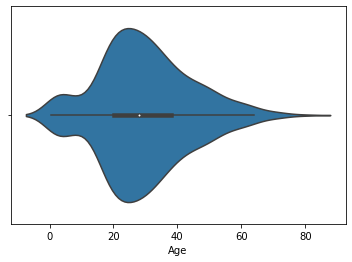

In [ ]:
sns.violinplot(x='Age', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

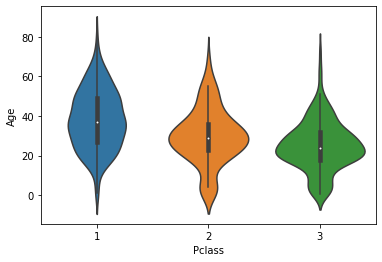

In [ ]:
# x축값인 Pclass의 값별로 y축 값인 Age의 연속분포 곡선을 알 수 있음.
sns.violinplot(x='Pclass', y='Age', data=titanic_df)


<AxesSubplot:xlabel='Sex', ylabel='Age'>

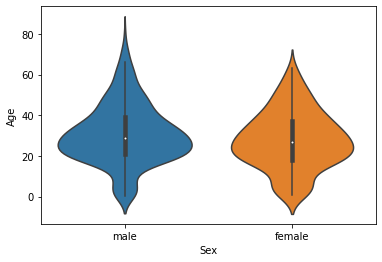

In [ ]:
# x축인 Sex값 별로 y축값이 Age의 값 분포를 알 수 있음.
sns.violinplot(x='Sex', y='Age', data=titanic_df)

## seaborn에서 subplots 이용하기


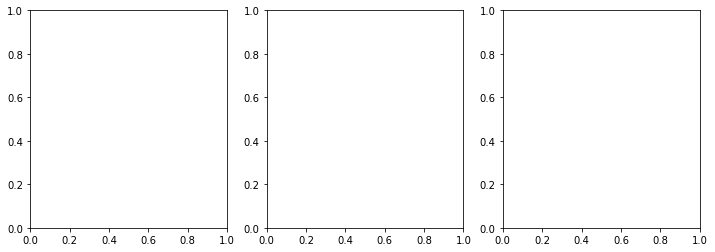

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))


In [ ]:
cat_columns = ['Survived', 'Pclass', 'Sex', 'Age_cat']
# nrows는 1이고 ncols는 컬럼의 갯수만큼인 subplots을 설정.
for index, column in enumerate(cat_columns):
    print(index, column)


0 Survived
1 Pclass
2 Sex
3 Age_cat


## subplots을 이용하여 주요 category성 컬럼의 건수를 시각화 하기


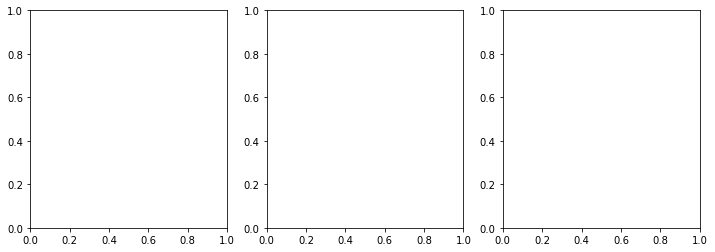

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

index: 0
index: 1
index: 2
index: 3


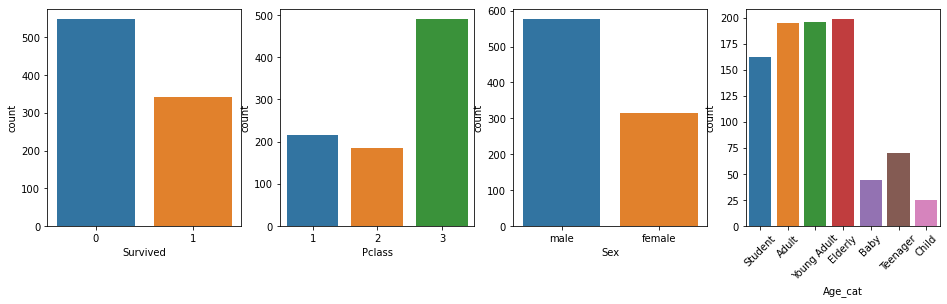

In [ ]:
cat_columns = ['Survived', 'Pclass', 'Sex', 'Age_cat']
# nrows는 1이고 ncols는 컬럼의 갯수만큼인 subplots을 설정.
fig, axs = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(16, 4))
for index, column in enumerate(cat_columns):
    print('index:', index)
    # seaborn의 Axes 레벨 function들은 ax인자로 subplots의 어느 Axes에 위치할지 설정.
    sns.countplot(x=column, data=titanic_df, ax=axs[index])
    if index == 3:
        # plt.xticks(rotation=90)으로 간단하게 할수 있지만 Axes 객체를 직접 이용할 경우 API가 상대적으로 복잡.
        axs[index].set_xticklabels(axs[index].get_xticklabels(), rotation=45)


In [ ]:
subplots을 이용하여 주요 category성 컬럼별로 컬럼값에 따른 생존율 시각화 하기

index: 0
index: 1
index: 2


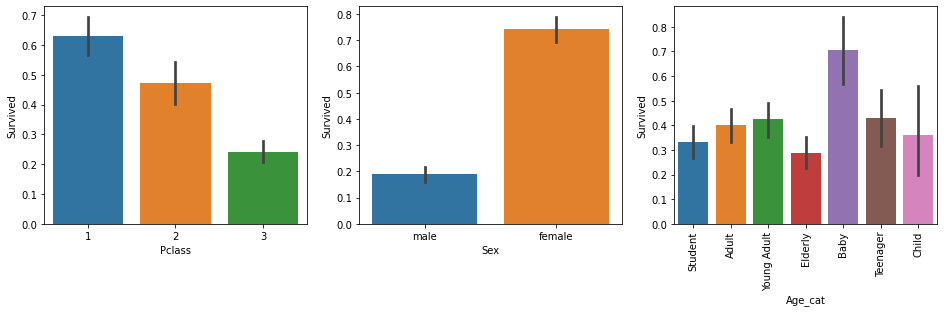

In [ ]:
cat_columns = ['Pclass', 'Sex', 'Age_cat']

# nrows는 1이고 ncols는 컬럼의 갯수만큼인 subplots을 설정.
fig, axs = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(16, 4))

for index, column in enumerate(cat_columns):
    print('index:', index)
    # seaborn의 Axes 레벨 function들은 ax인자로 subplots의 어느 Axes에 위치할지 설정.
    sns.barplot(x=column, y='Survived', data=titanic_df, ax=axs[index])
    if index == 2:
        # plt.xticks(rotation=90)으로 간단하게 할수 있지만 Axes 객체를 직접 이용할 경우 API가 상대적으로 복잡.
        axs[index].set_xticklabels(axs[index].get_xticklabels(), rotation=90)


### subplots를 이용하여 여러 연속형 컬럼값들의 Survived 값에 따른 연속 분포도를 시각화
    왼쪽에는 Violin Plot으로
    오른쪽에는 Survived가 0일때의 Histogram과 Survived가 1일때의 Histogram을 함께 표현

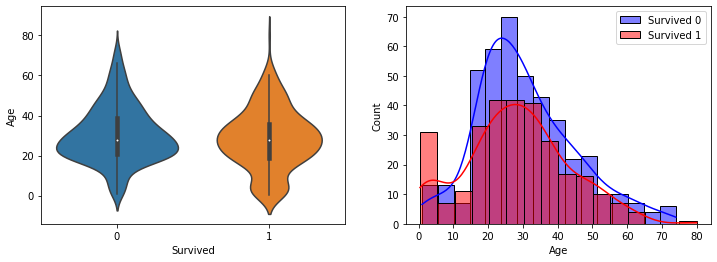

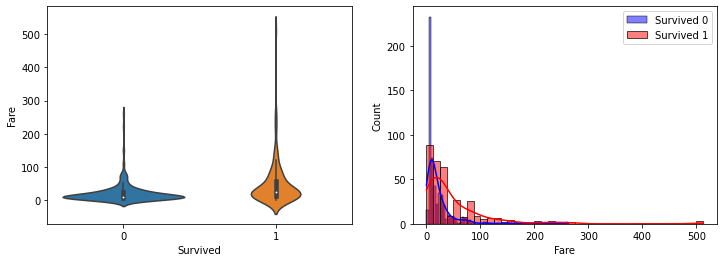

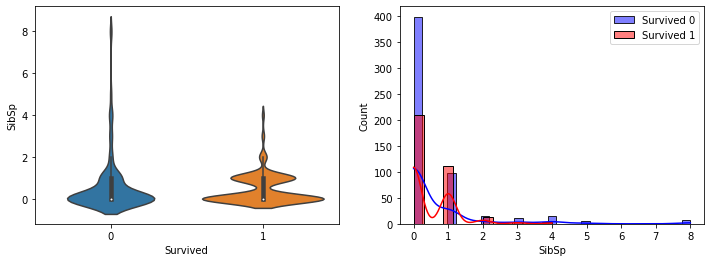

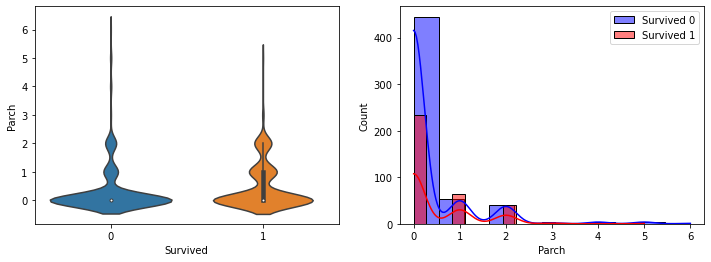

In [ ]:
def show_hist_by_target(df, columns):
    cond_1 = (df['Survived'] == 1)
    cond_0 = (df['Survived'] == 0)
    for column in columns:
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
        sns.violinplot(x='Survived', y=column, data=df, ax=axs[0] )
        sns.histplot(df[cond_0][column], ax=axs[1], kde=True, label='Survived 0', color='blue')
        sns.histplot(df[cond_1][column], ax=axs[1], kde=True, label='Survived 1', color='red')
        axs[1].legend()
cont_columns = ['Age', 'Fare', 'SibSp', 'Parch']
show_hist_by_target(titanic_df, cont_columns)

In [ ]:
box plot
4분위를 박스 형태로 표현
x축값에 이산값을 부여하면 이산값에 따른 box plot을 시각화

<AxesSubplot:ylabel='Age'>

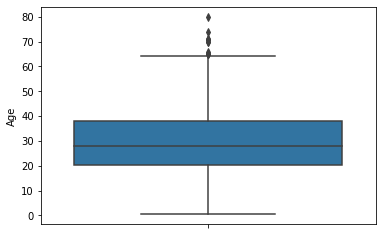

In [ ]:
sns.boxplot(y='Age', data=titanic_df)


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

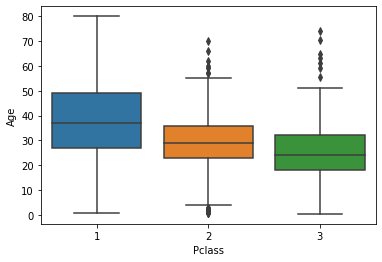

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=titanic_df)


In [ ]:
scatter plot
산포도로서 X와 Y축에 보통 연속형 값을 시각화. hue, style등을 통해 breakdown 정보를 표출할 수 있습니다.


<AxesSubplot:xlabel='Age', ylabel='Fare'>

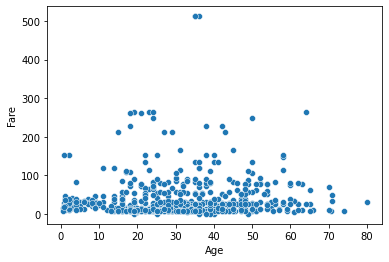

In [ ]:
sns.scatterplot(x='Age', y='Fare', data=titanic_df)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

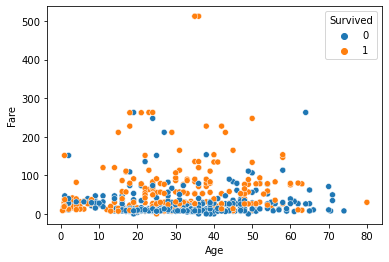

In [ ]:
sns.scatterplot(x='Age', y='Fare', data=titanic_df, hue='Survived')


<AxesSubplot:xlabel='Age', ylabel='Fare'>

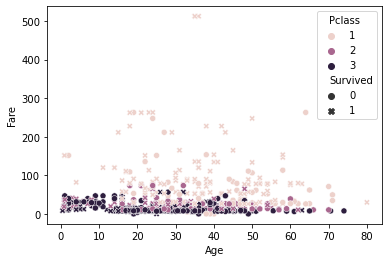

In [ ]:
sns.scatterplot(x='Age', y='Fare', data=titanic_df, hue='Pclass',style='Survived')


In [ ]:
상관 Heatmap
컬럼간의 상관도를 Heatmap형태로 표현

In [ ]:
titanic_df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

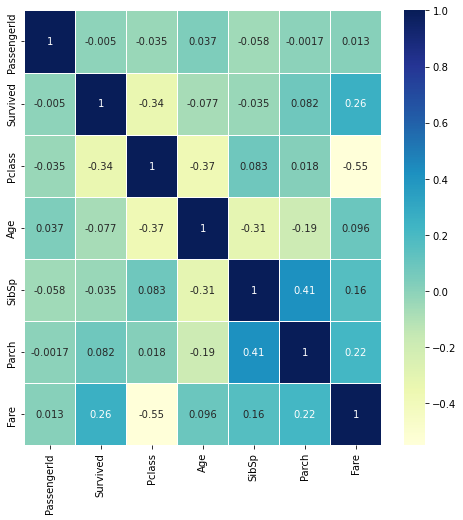

In [ ]:
### 상관 Heatmap
plt.figure(figsize=(8, 8))
# DataFrame의 corr()은 숫자형 값만 상관도를 구함.
corr = titanic_df.corr()
#sns.heatmap(corr)
#sns.heatmap(corr, annot=True, fmt='.1f', linewidths=0.5, cmap='YlGnBu')
                                    #2g = 소수점 2쨰자리
sns.heatmap(corr, annot=True, fmt='.2g', cbar=True, linewidths=0.5, cmap='YlGnBu')
